# Customer Churn Dataset is a Classification model

In [1]:
print(('*'*127))
print("                                                      Customer Churn Prediction                                                                 ")
print(('*'*127))

*******************************************************************************************************************************
                                                      Customer Churn Prediction                                                                 
*******************************************************************************************************************************


In [2]:
import pandas as pd
import numpy as np
import seaborn as sn


from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/DSData/master/Telecom_customer_churn.csv")

pd.set_option('display.max_rows', 7000)
pd.set_option('display.max_columns', 21)


df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [3]:
df.shape

(7043, 21)

* Here we that there is 7043 Rows and 21 Columns for this Dataset

In [4]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

* Here we observe that majority of the Columns are of Object type for this column and Churn is our Target variable

In [5]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

* For this Dataset we do not have null-values

# Dataset Descirption

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.



# Attributes

The Following are the attributes which signifies the further prediction of the Attrition levels:

-- (1) Age : The age of each individuals in the dataset

-- (2) BusinessTravel: Determining wether or not the person travels to often

-- (3) DailyRate: The dailyRate given to the individual

-- (4) Department: The department refers to his feild of proffession 

-- (5) DistanceFromHome: The distance of office to Home

-- (6) Education: The full education received by the individual

-- (7) EducationField: The feild of personel expertise by the individual

-- (8) EmployeeCount: The Count of the Employees based on Department

-- (9) EmployeeNumber: The No of employees of the company

-- (10) EnvironmentSatisfaction: The satisfaction level by the individual on the enviroment

-- (11) Gender: The type of sex the individual belongs to 

-- (12) HourlyRate: The Hourly pay scale of the employee

-- (13) JobInvolvement: The score of an individual based on the devotness to the jpb

-- (14) JobLevel: The level of difficulty of the job

-- (15) JobRole: The given job role by the company

-- (16) JobSatisfaction: The rate of job and enviroment satisfaction by an individual

-- (17) MaritalStatus: categorising the married, divorced or not married status

-- (18) RelationshipSatisfaction: The rate of satisfaction in the personel life

-- (19) StandardHours: The standard working hours of an individual

-- (20) StockOptionLevel: The right to purchase stocks from the company

-- (21) TotalWorkingYears: The No of years the individual has been working

-- (22) TrainingTimesLastYear: The No of training given to an individual for improval

-- (23) WorkLifeBalance: The Rate of an individual balancing work and life

-- (24) YearsAtCompany: The No of years at a given comapny

-- (25) YearsInCurrentRole: The No of years at the same job role

-- (26) YearsSinceLastPromotion: The last when an individual was promoted

-- (27) YearsWithCurrManager: The No of years with the present or previous manager

In [6]:
df['gender'].value_counts()

Male      3555
Female    3488
Name: gender, dtype: int64

In [7]:
df['Partner'].value_counts()

No     3641
Yes    3402
Name: Partner, dtype: int64

In [8]:
df['Dependents'].value_counts()

No     4933
Yes    2110
Name: Dependents, dtype: int64

In [9]:
df['PhoneService'].value_counts()

Yes    6361
No      682
Name: PhoneService, dtype: int64

In [10]:
df['MultipleLines'].value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [11]:
df['InternetService'].value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [12]:
df['OnlineSecurity'].value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [13]:
df['OnlineBackup'].value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [14]:
df['DeviceProtection'].value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [15]:
df['TechSupport'].value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [16]:
df['StreamingTV'].value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [17]:
df['StreamingMovies'].value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [18]:
df['Contract'].value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [19]:
df['PaperlessBilling'].value_counts()

Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64

In [20]:
df['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [21]:
df['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

# Data Cleaning

# LabelEncoder

In [22]:
from sklearn.preprocessing import LabelEncoder

lb=LabelEncoder()


df["Churn"] = lb.fit_transform(df["Churn"])

In [23]:
from sklearn.preprocessing import OrdinalEncoder

oe=OrdinalEncoder()

for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=oe.fit_transform(df[i].values.reshape(-1,1))

# Checking VIF ( Variance Inflation Factor )

In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(df):
    vif=pd.DataFrame()
    vif["F"] = df.columns
    vif["VIF_Value"] = [variance_inflation_factor(df.values, i)for i in range(df.shape[1])]
    return(vif)

F=df.iloc[:,:-1]
F.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,5375.0,0.0,0,1.0,0.0,1,0.0,1.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,29.85,2505.0
1,3962.0,1.0,0,0.0,0.0,34,1.0,0.0,0.0,2.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0,3.0,56.95,1466.0
2,2564.0,1.0,0,0.0,0.0,2,1.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,53.85,157.0
3,5535.0,1.0,0,0.0,0.0,45,0.0,1.0,0.0,2.0,0.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0,42.30,1400.0
4,6511.0,0.0,0,0.0,0.0,2,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,70.70,925.0


In [25]:
calculate_vif(F)

,F,VIF_Value
0,customerID,3.556480
1,gender,1.942648
2,SeniorCitizen,1.367362
3,Partner,2.821161
4,Dependents,1.955470
5,tenure,7.488342
6,PhoneService,14.530031
7,MultipleLines,2.755460
8,InternetService,4.331303
9,OnlineSecurity,2.260538


* Here we do not observe any High correlation or Multicolinearity 

# Outlier Check and Removal

In [26]:
df1 = df[['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService']]

In [27]:
df2 = df[['StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']]

In [28]:
df3 = df[['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV']]

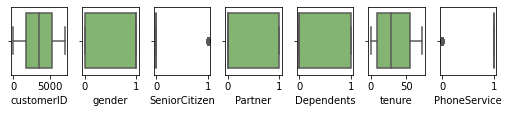

In [29]:
Columns = df1.columns.values
ncolumns = 20
nrows = 10
plt.figure(figsize=[20,15])
for i in range(0, len(Columns)):
    plt.subplot(nrows,ncolumns,i+1)
    sn.boxplot(df1[Columns[i]], color='green', orient='H', palette='summer_r')
    plt.tight_layout()

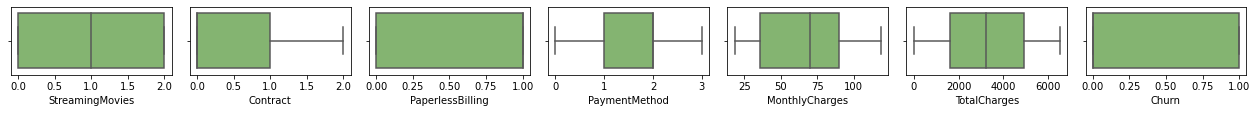

In [30]:
Columns = df2.columns.values
ncolumns = 8
nrows = 10
plt.figure(figsize=[20,15])
for i in range(0, len(Columns)):
    plt.subplot(nrows,ncolumns,i+1)
    sn.boxplot(df2[Columns[i]], color='green', orient='H', palette='summer_r')
    plt.tight_layout()

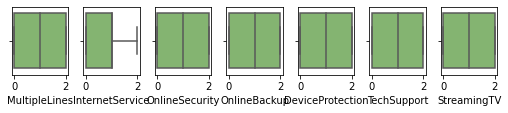

In [31]:
Columns = df3.columns.values
ncolumns = 20
nrows = 10
plt.figure(figsize=[20,15])
for i in range(0, len(Columns)):
    plt.subplot(nrows,ncolumns,i+1)
    sn.boxplot(df3[Columns[i]], color='green', orient='H', palette='summer_r')
    plt.tight_layout()

In [32]:
from scipy.stats import zscore
import numpy as np
Z = np.abs(zscore(df))
Z.shape

(7043, 21)

In [33]:
threshold = 3
print(np.where(Z>3))
new_df = df[(Z<3).all(axis=1)]

(array([   0,    3,    7,   20,   27,   62,   81,   89,  103,  105,  107,
        114,  116,  129,  131,  133,  168,  180,  185,  187,  206,  211,
        215,  216,  217,  225,  236,  252,  255,  259,  260,  263,  272,
        278,  303,  321,  324,  328,  348,  354,  358,  372,  376,  382,
        387,  398,  424,  431,  435,  452,  465,  481,  488,  495,  498,
        544,  569,  596,  610,  616,  620,  634,  660,  667,  669,  674,
        677,  688,  716,  718,  735,  765,  776,  784,  790,  794,  813,
        829,  843,  847,  859,  866,  873,  875,  877,  884,  893,  917,
        934,  941,  943,  960,  973, 1011, 1018, 1037, 1050, 1051, 1053,
       1072, 1110, 1119, 1122, 1144, 1146, 1150, 1161, 1169, 1182, 1204,
       1221, 1225, 1242, 1255, 1257, 1271, 1278, 1298, 1311, 1326, 1331,
       1333, 1334, 1340, 1349, 1352, 1365, 1379, 1402, 1407, 1416, 1452,
       1479, 1480, 1481, 1500, 1506, 1513, 1519, 1560, 1562, 1581, 1584,
       1614, 1620, 1634, 1637, 1652, 1689, 1692, 1

In [34]:
new_df.shape

(6361, 21)

# DataLoss %

In [35]:
Loss = (7043/6361)/7043*100

In [36]:
Loss

0.015720798616569723

* Here we observe a Datasloss of 0.01% after the Outlier check and removal

In [37]:
new_df['gender'].value_counts()

1.0    3204
0.0    3157
Name: gender, dtype: int64

In [38]:
new_df['Partner'].value_counts()

0.0    3270
1.0    3091
Name: Partner, dtype: int64

In [39]:
new_df['Dependents'].value_counts()

0.0    4457
1.0    1904
Name: Dependents, dtype: int64

In [40]:
new_df['PhoneService'].value_counts()

1.0    6361
Name: PhoneService, dtype: int64

In [41]:
new_df['MultipleLines'].value_counts()

0.0    3390
2.0    2971
Name: MultipleLines, dtype: int64

In [42]:
new_df['InternetService'].value_counts()

1.0    3096
0.0    1739
2.0    1526
Name: InternetService, dtype: int64

In [43]:
new_df['OnlineSecurity'].value_counts()

0.0    3099
2.0    1736
1.0    1526
Name: OnlineSecurity, dtype: int64

In [44]:
new_df['OnlineBackup'].value_counts()

0.0    2693
2.0    2142
1.0    1526
Name: OnlineBackup, dtype: int64

In [45]:
new_df['DeviceProtection'].value_counts()

0.0    2718
2.0    2117
1.0    1526
Name: DeviceProtection, dtype: int64

In [46]:
new_df['TechSupport'].value_counts()

0.0    3080
2.0    1755
1.0    1526
Name: TechSupport, dtype: int64

In [47]:
new_df['StreamingTV'].value_counts()

2.0    2422
0.0    2413
1.0    1526
Name: StreamingTV, dtype: int64

In [48]:
new_df['StreamingMovies'].value_counts()

2.0    2434
0.0    2401
1.0    1526
Name: StreamingMovies, dtype: int64

In [49]:
new_df['Contract'].value_counts()

0.0    3499
2.0    1534
1.0    1328
Name: Contract, dtype: int64

In [50]:
new_df['PaperlessBilling'].value_counts()

1.0    3784
0.0    2577
Name: PaperlessBilling, dtype: int64

In [51]:
new_df['PaymentMethod'].value_counts()

2.0    2139
3.0    1453
0.0    1401
1.0    1368
Name: PaymentMethod, dtype: int64

In [52]:
new_df['Churn'].value_counts()

0    4662
1    1699
Name: Churn, dtype: int64

In [53]:
new_df['gender'].value_counts()

1.0    3204
0.0    3157
Name: gender, dtype: int64

# EDA

# Univariate Analysis

<AxesSubplot:xlabel='customerID', ylabel='Density'>

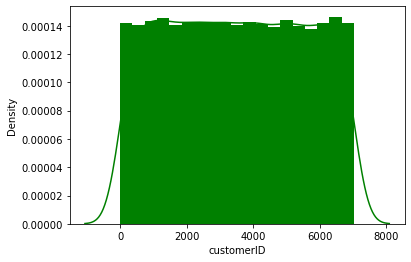

In [54]:
sn.distplot(new_df["customerID"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data

<AxesSubplot:xlabel='gender', ylabel='Density'>

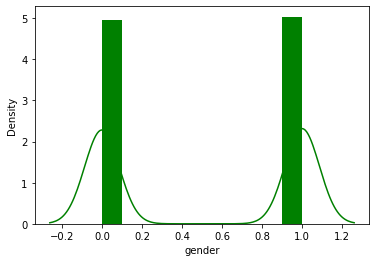

In [55]:
sn.distplot(new_df["gender"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='SeniorCitizen', ylabel='Density'>

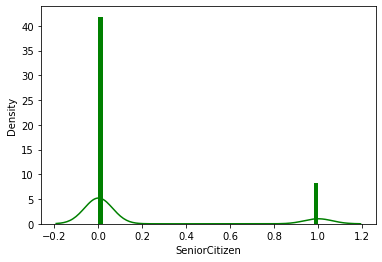

In [56]:
sn.distplot(new_df["SeniorCitizen"], hist_kws={'alpha':1}, color='g')

* Here we observe high Positive skewness in data

<AxesSubplot:xlabel='Partner', ylabel='Density'>

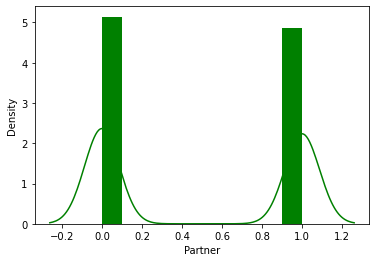

In [57]:
sn.distplot(new_df["Partner"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data

<AxesSubplot:xlabel='Dependents', ylabel='Density'>

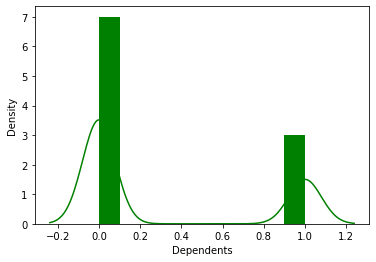

In [58]:
sn.distplot(new_df["Dependents"], hist_kws={'alpha':1}, color='g')

* Here we observe moderate Positive skewness in data

<AxesSubplot:xlabel='tenure', ylabel='Density'>

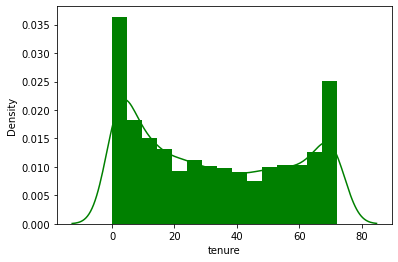

In [59]:
sn.distplot(new_df["tenure"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data

<AxesSubplot:xlabel='PhoneService', ylabel='Density'>

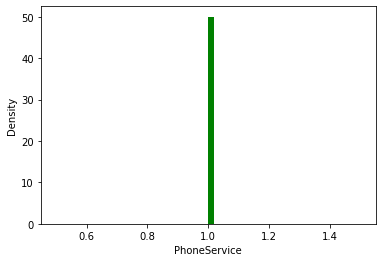

In [60]:
sn.distplot(new_df["PhoneService"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data

<AxesSubplot:xlabel='MultipleLines', ylabel='Density'>

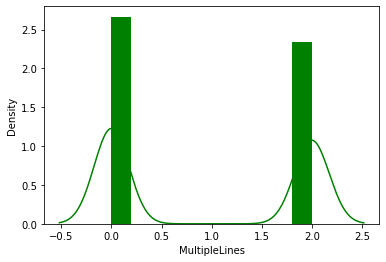

In [61]:
sn.distplot(new_df["MultipleLines"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data

<AxesSubplot:xlabel='InternetService', ylabel='Density'>

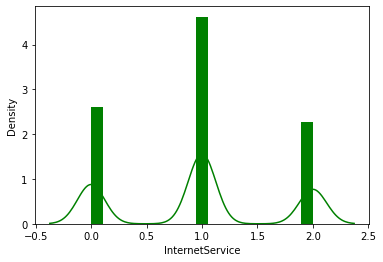

In [62]:
sn.distplot(new_df["InternetService"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data

<AxesSubplot:xlabel='OnlineSecurity', ylabel='Density'>

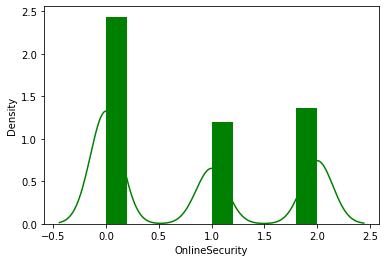

In [63]:
sn.distplot(new_df["OnlineSecurity"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data

<AxesSubplot:xlabel='OnlineBackup', ylabel='Density'>

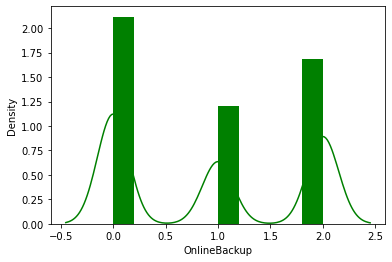

In [64]:
sn.distplot(new_df["OnlineBackup"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data

<AxesSubplot:xlabel='DeviceProtection', ylabel='Density'>

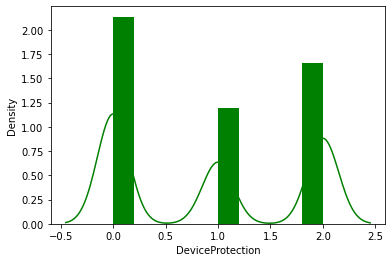

In [65]:
sn.distplot(new_df["DeviceProtection"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data

<AxesSubplot:xlabel='TechSupport', ylabel='Density'>

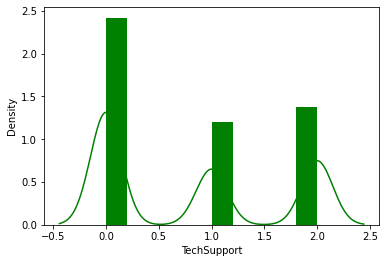

In [66]:
sn.distplot(new_df["TechSupport"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data

<AxesSubplot:xlabel='StreamingTV', ylabel='Density'>

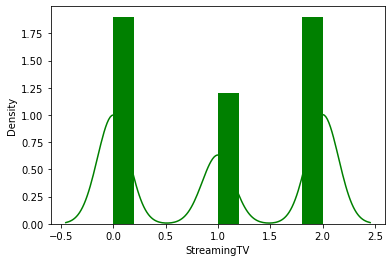

In [67]:
sn.distplot(new_df["StreamingTV"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='StreamingMovies', ylabel='Density'>

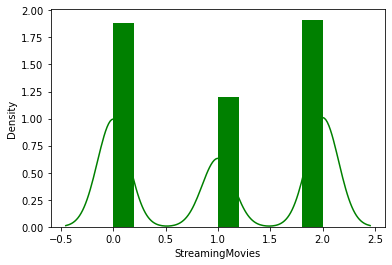

In [68]:
sn.distplot(new_df["StreamingMovies"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='Contract', ylabel='Density'>

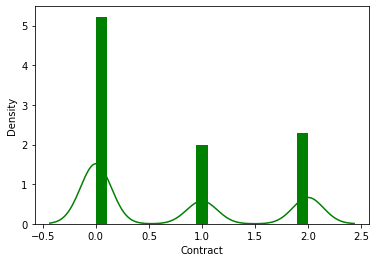

In [69]:
sn.distplot(new_df["Contract"], hist_kws={'alpha':1}, color='g')

* Here we observe a good distribution of data

<AxesSubplot:xlabel='PaperlessBilling', ylabel='Density'>

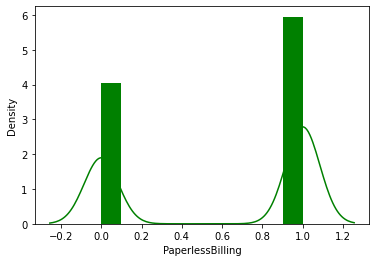

In [70]:
sn.distplot(new_df["PaperlessBilling"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='MonthlyCharges', ylabel='Density'>

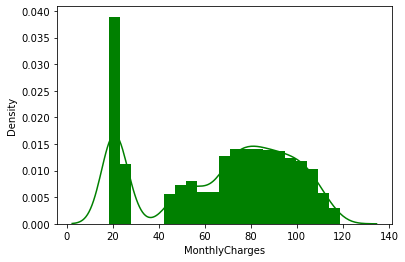

In [71]:
sn.distplot(new_df["MonthlyCharges"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='TotalCharges', ylabel='Density'>

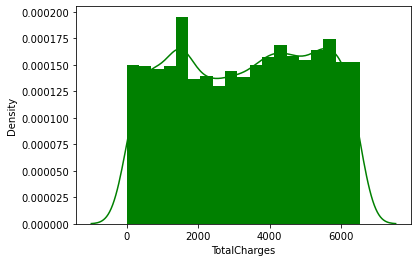

In [72]:
sn.distplot(new_df["TotalCharges"], hist_kws={'alpha':1}, color='g')

* Here we observe a good negative distribution of data

<AxesSubplot:xlabel='Churn', ylabel='Density'>

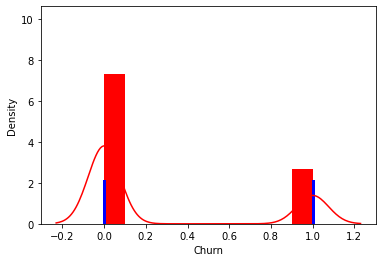

In [73]:
sn.distplot(new_df["Churn"], hist_kws={'alpha':1}, color='r', rug=True, rug_kws={"color": "b", "alpha": 0.5, "linewidth": 3, "height":0.2})

* Here we observe high Positive skewness in data

# Scatterplot

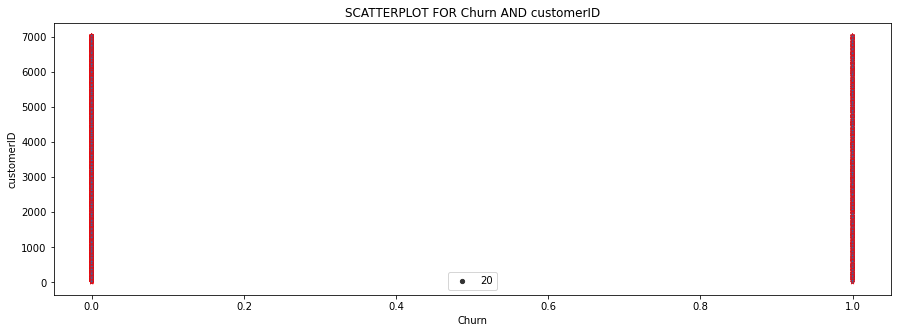

In [74]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Churn AND customerID')

sn.scatterplot(new_df['Churn'], new_df['customerID'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe almost equal scattered data for both Churn report for all customerID data

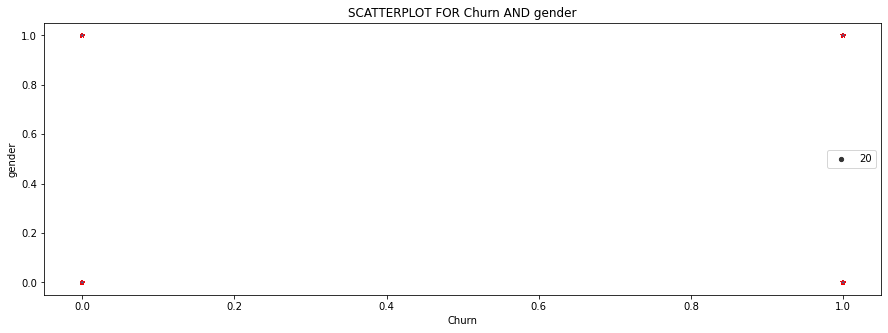

In [75]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Churn AND gender')

sn.scatterplot(new_df['Churn'], new_df['gender'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal scattered data for both Churn report for all gender data

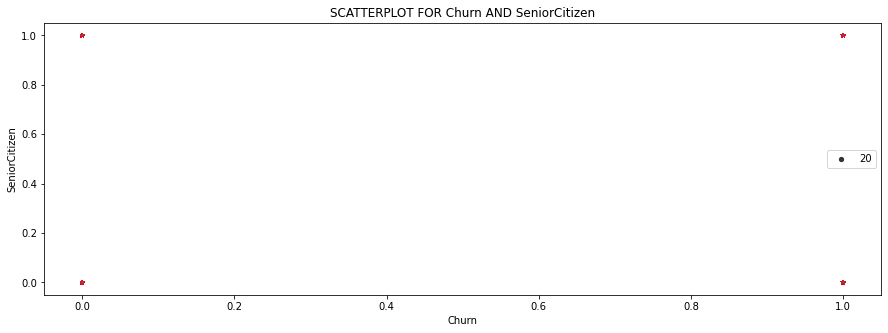

In [76]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Churn AND SeniorCitizen')

sn.scatterplot(new_df['Churn'], new_df['SeniorCitizen'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal scattered data for both Churn report for all SeniorCitizen data

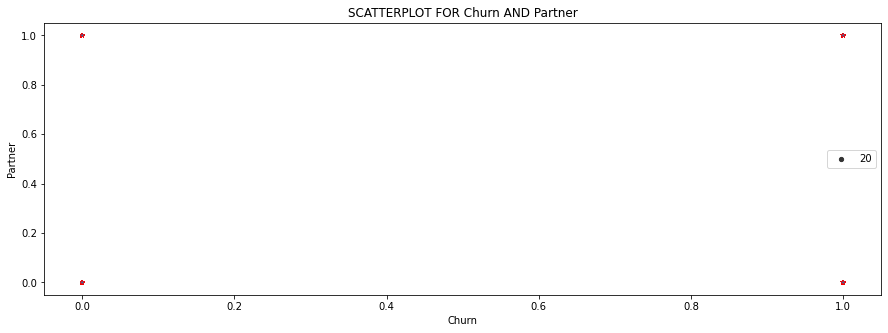

In [77]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Churn AND Partner')

sn.scatterplot(new_df['Churn'], new_df['Partner'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal scattered data for both Churn report for all Partner data

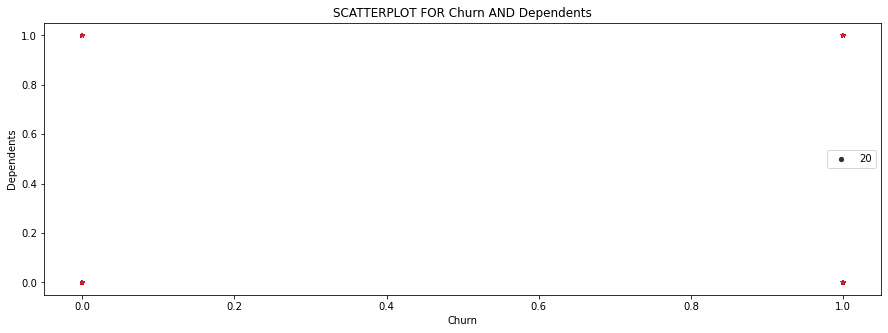

In [78]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Churn AND Dependents')

sn.scatterplot(new_df['Churn'], new_df['Dependents'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal scattered data for both Churn report for all Dependents data

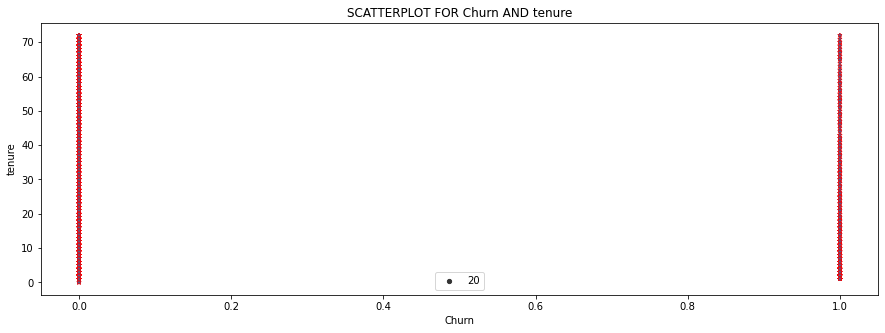

In [79]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Churn AND tenure')

sn.scatterplot(new_df['Churn'], new_df['tenure'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal scattered data for both Churn report for all tenure data

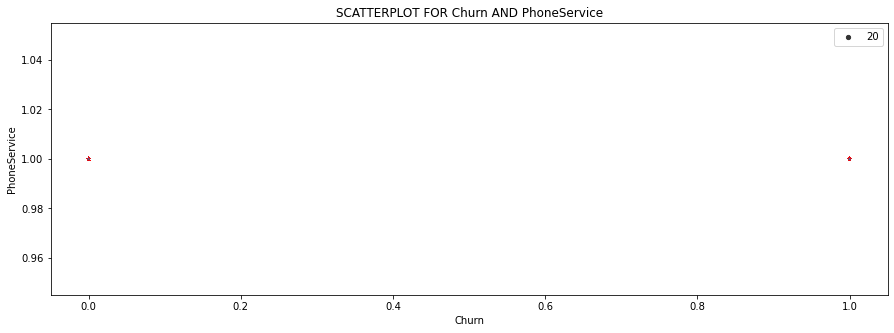

In [80]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Churn AND PhoneService')

sn.scatterplot(new_df['Churn'], new_df['PhoneService'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal scattered data for both Churn report for all tenure data

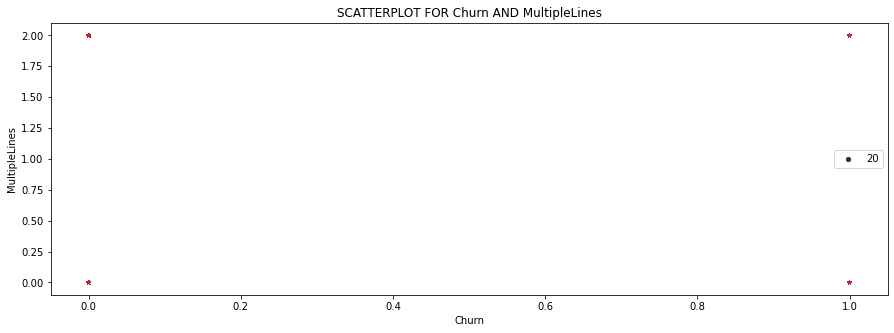

In [81]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Churn AND MultipleLines')

sn.scatterplot(new_df['Churn'], new_df['MultipleLines'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal scattered data for both Churn report for all MultipleLines data

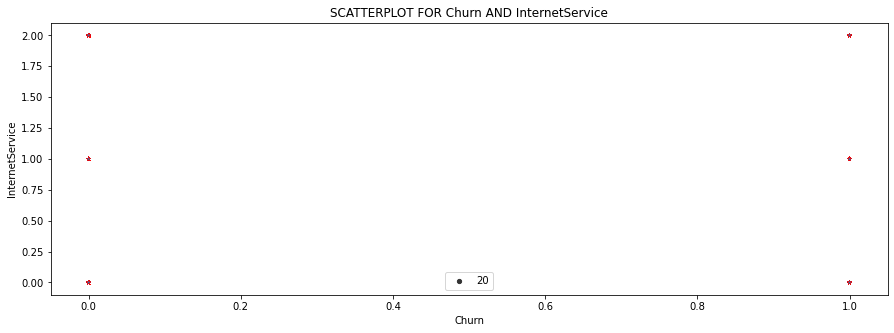

In [82]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Churn AND InternetService')

sn.scatterplot(new_df['Churn'], new_df['InternetService'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal scattered data for both Churn report for all InternetService data

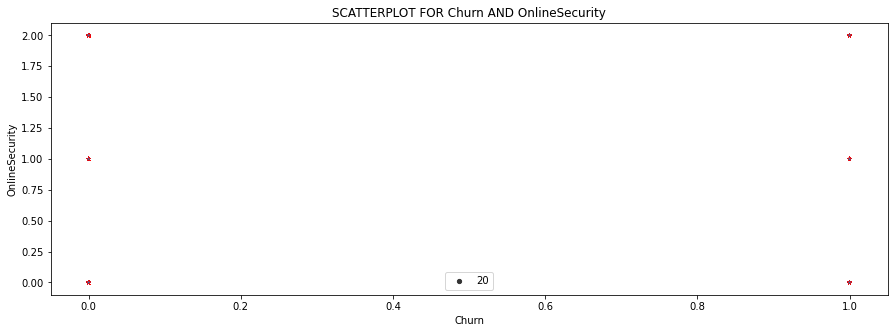

In [83]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Churn AND OnlineSecurity')

sn.scatterplot(new_df['Churn'], new_df['OnlineSecurity'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal scattered data for both Churn report for all OnlineSecurity data

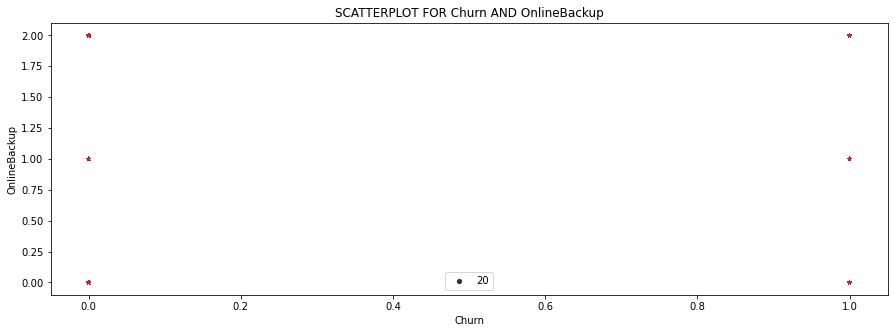

In [84]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Churn AND OnlineBackup')

sn.scatterplot(new_df['Churn'], new_df['OnlineBackup'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal scattered data for both Churn report for all OnlineBackup data

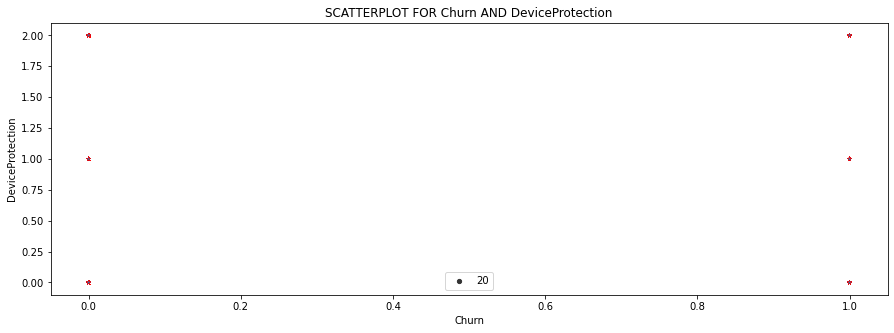

In [85]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Churn AND DeviceProtection')

sn.scatterplot(new_df['Churn'], new_df['DeviceProtection'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal scattered data for both Churn report for all DeviceProtection data

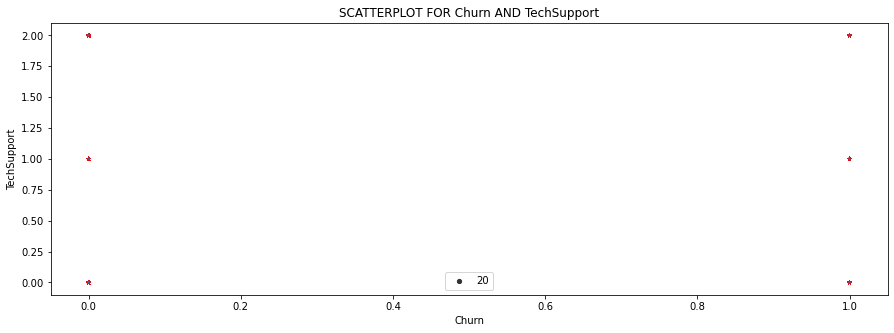

In [86]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Churn AND TechSupport')

sn.scatterplot(new_df['Churn'], new_df['TechSupport'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal scattered data for both Churn report for all DeviceProtection data

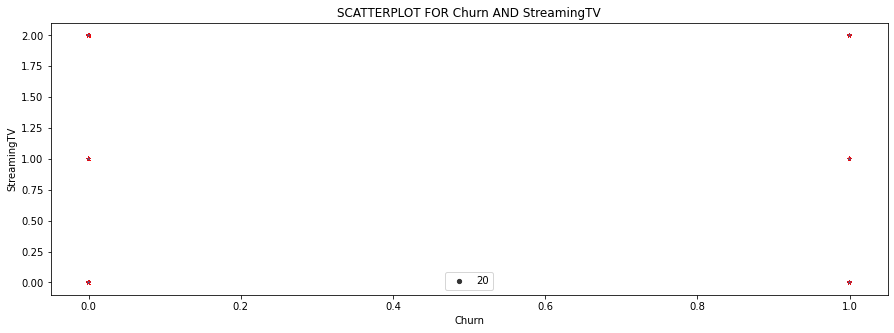

In [87]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Churn AND StreamingTV')

sn.scatterplot(new_df['Churn'], new_df['StreamingTV'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal scattered data for both Churn report for all StreamingTV data

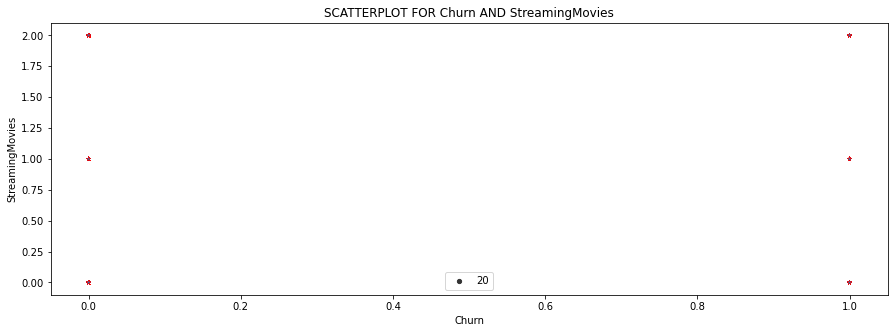

In [88]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Churn AND StreamingMovies')

sn.scatterplot(new_df['Churn'], new_df['StreamingMovies'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal scattered data for both Churn report for all StreamingMovies data

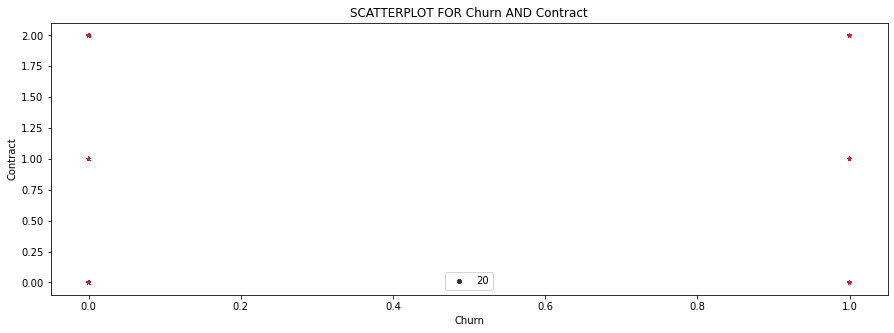

In [89]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Churn AND Contract')

sn.scatterplot(new_df['Churn'], new_df['Contract'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal scattered data for both Churn report for all Contract data

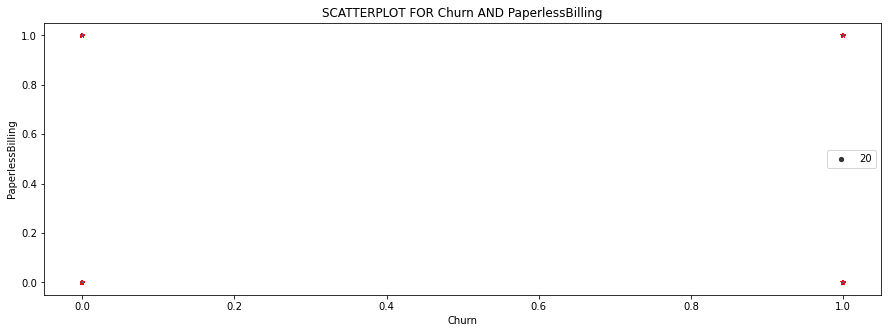

In [90]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Churn AND PaperlessBilling')

sn.scatterplot(new_df['Churn'], new_df['PaperlessBilling'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal scattered data for both Churn report for all PaperlessBilling data

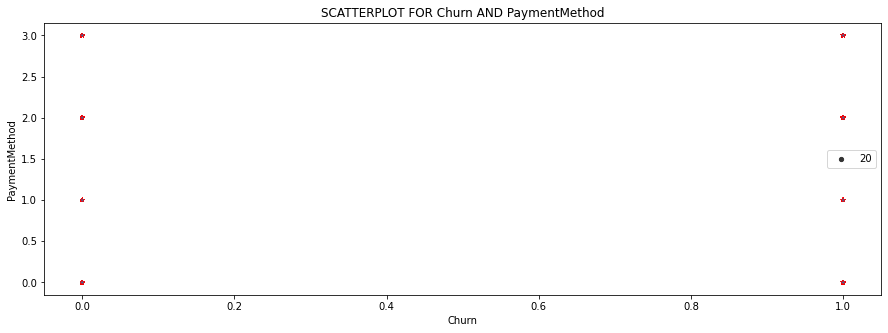

In [91]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Churn AND PaymentMethod')

sn.scatterplot(new_df['Churn'], new_df['PaymentMethod'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal scattered data for both Churn report for all PaymentMethod data

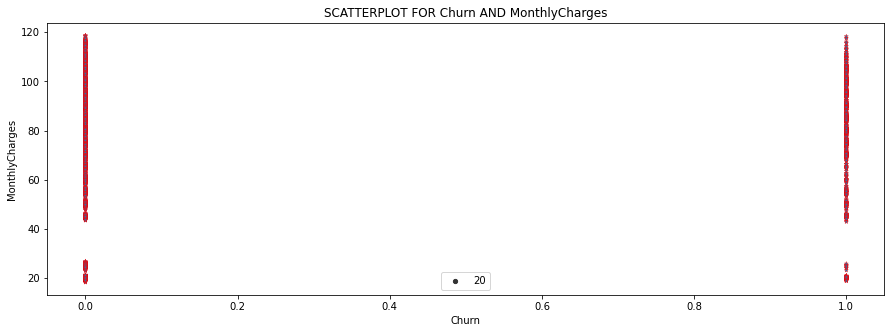

In [92]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Churn AND MonthlyCharges')

sn.scatterplot(new_df['Churn'], new_df['MonthlyCharges'], size=20, marker ="*", edgecolor ="red", alpha=1);

#* Here we observe slightly higher scattered data on No Churn report for all MonthlyCharges data

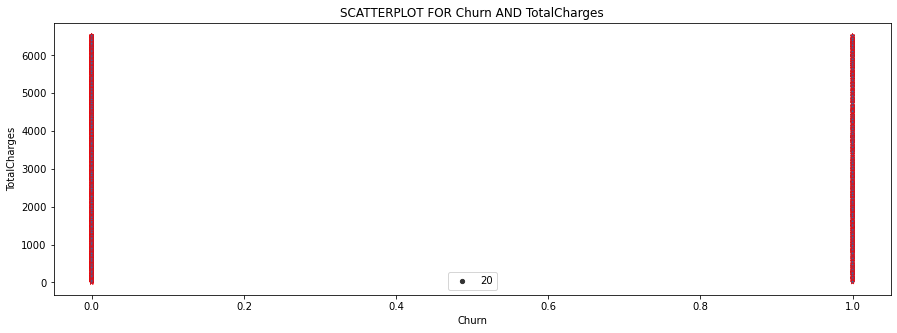

In [93]:
plt.figure(figsize=[15,5])

plt.title('SCATTERPLOT FOR Churn AND TotalCharges')

sn.scatterplot(new_df['Churn'], new_df['TotalCharges'], size=20, marker ="*", edgecolor ="red", alpha=1);

* Here we observe equal scattered data for both Churn report for all TotalCharges data